<a href="https://colab.research.google.com/github/sarahlai30/Machine-Learning-INDE-577/blob/main/Unsupervised%20Learning/Image_Compression_with_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Compression with Singular Value Decomposition**
Singular Value Decomposition (SVD) compresses images by keeping only the most important features. In an image matrix, similar pixels often repeat, creating redundancy. SVD identifies and retains only the essential patterns (singular values) while discarding less significant details, reducing the file size while maintaining a recognizable version of the image.



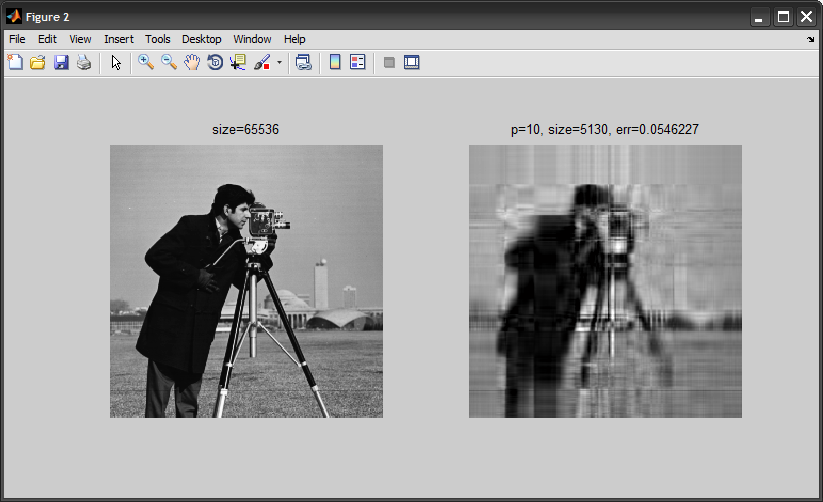

A **matrix** is a rectangular grid of numbers arranged in rows and columns. SVD is a method that breaks down a matrix 𝐴

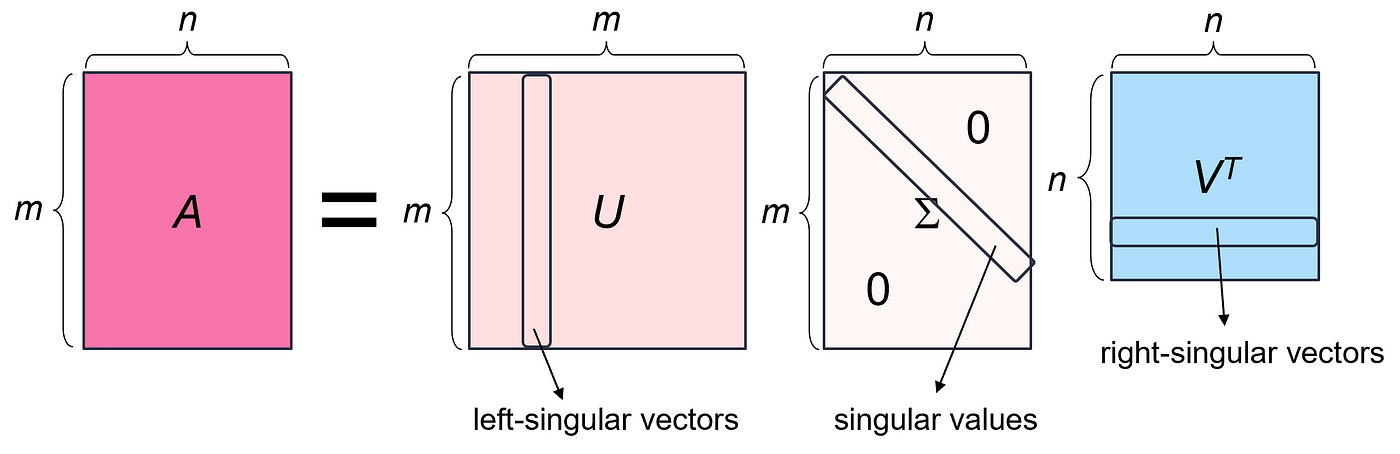


This decomposition simplifies complex matrix operations and is widely used in data compression, solving equations in machine learning, and uncovering patterns in data.

**What Are These Matrices?**

U: Left Singular Matrix

*   Contains orthogonal columns (like coordinate axes).
*   Describes rotations or reflections in the output space.

Σ: Singular Value Matrix

*   A diagonal matrix with non-negative singular values.
*   These singular values tell how much "stretching" happens along specific directions.

The larger the value, the more important that direction is.

𝑉': Right Singular Matrix


*   Contains orthogonal columns as well.
*   Describes rotations or reflections in the input space.

SVD simplifies a complicated transformation represented by matrix
𝐴 into three intuitive steps. First, 𝑉' rotates the input space into new coordinate axes. Then, Σ stretches the rotated space along key directions, determined by the singular values. Finally, 𝑈 rotates the stretched space into the output space.

**Image compression** using Singular Value Decomposition (SVD) works by approximating an image matrix using only its most important singular values, reducing storage space while preserving key visual features.

An image can be represented as a matrix of pixel intensity values. In a grayscale image, each pixel corresponds to a value between 0 (black) and 255 (white). A color image is composed of three such matrices, representing the red, green, and blue channels.

We will go throught the process of SVD below. First we upload an image.

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# List uploaded files
for file_name in uploaded.keys():
    print(f"Uploaded file: {file_name}")

Saving IMG_2209.jpeg to IMG_2209.jpeg
Uploaded file: IMG_2209.jpeg


Then converting to grey scale:

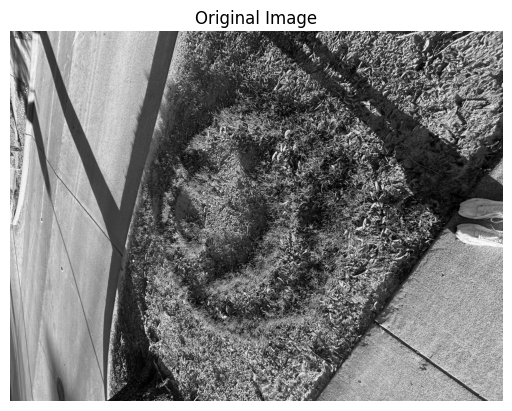

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Load the image
img = mpimg.imread("IMG_2209.jpeg")

# Convert to grayscale if RGB image
if img.ndim == 3:
    img = np.mean(img, axis=-1)

# Display the original image
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

In the code below, we conduct SVD manually to explicitly show the steps.

1. **Prepare the Matrix**

The image matrix img is assigned to A.
The matrix A (denoted as ATA) is computed using the dot product.
This matrix is used because its eigenvectors correspond to the right singular vectors of A.

2.   **Compute Eigenvalues and Eigenvectors** using np.linalg.eigh().

eigvals_V stores the eigenvalues, and V stores the eigenvectors (columns).
These eigenvectors form the matrix 𝑉, which contains the right singular vectors of 𝐴.

3.   **Sort in Descending Order** to ensure the singular values are ordered from largest to smallest, as required by SVD.
4. **Compute Singular Values**

Singular values are computed by taking the square root of the absolute values of the eigenvalues. The absolute value is used to avoid negative eigenvalues due to rounding errors.

5. **Compute Matrix 𝑈** by multiplying 𝐴 by the eigenvectors of 𝐴𝑇𝐴 (which form 𝑉) and scaling by singular values gives the left singular vectors in 𝑈.
6. **Handle Zero Singular Values**



In [ ]:
A = img
ATA = np.dot(A.T, A)

# Compute eigenvalues and eigenvectors of A^T A
eigvals_V, V = np.linalg.eigh(ATA)

# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eigvals_V)[::-1]
eigvals_V = eigvals_V[idx]
V = V[:, idx]

# Compute singular values (sqrt of eigenvalues)
S = np.sqrt(np.abs(eigvals_V))  # Take absolute value to avoid NaNs

# Compute U from A and V
U = np.dot(A, V) / S

# Fix numerical issues where singular values might be zero
U[:, S == 0] = 0

We define a function reconstruct_image_manual to reconstruct the image using only the first 𝑘 singular values and corresponding vectors from 𝑈, Σ, and 𝑉.

*   Extract the top 𝑘 singular values and forms a diagonal matrix.
*   Extract the first 𝑘 columns from
𝑈, which correspond to the most significant left singular vectors.


*   Extract the first 𝑘 columns from V, representing the most important right singular vector.
*   Reconstruct the image using the SVD formula.

This result approximates the original image using only the top 𝑘 components.

In [ ]:
# Function to reconstruct the image
def reconstruct_image_manual(U, S, V, k):
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    V_k = V[:, :k]
    return np.dot(U_k, np.dot(S_k, V_k.T))

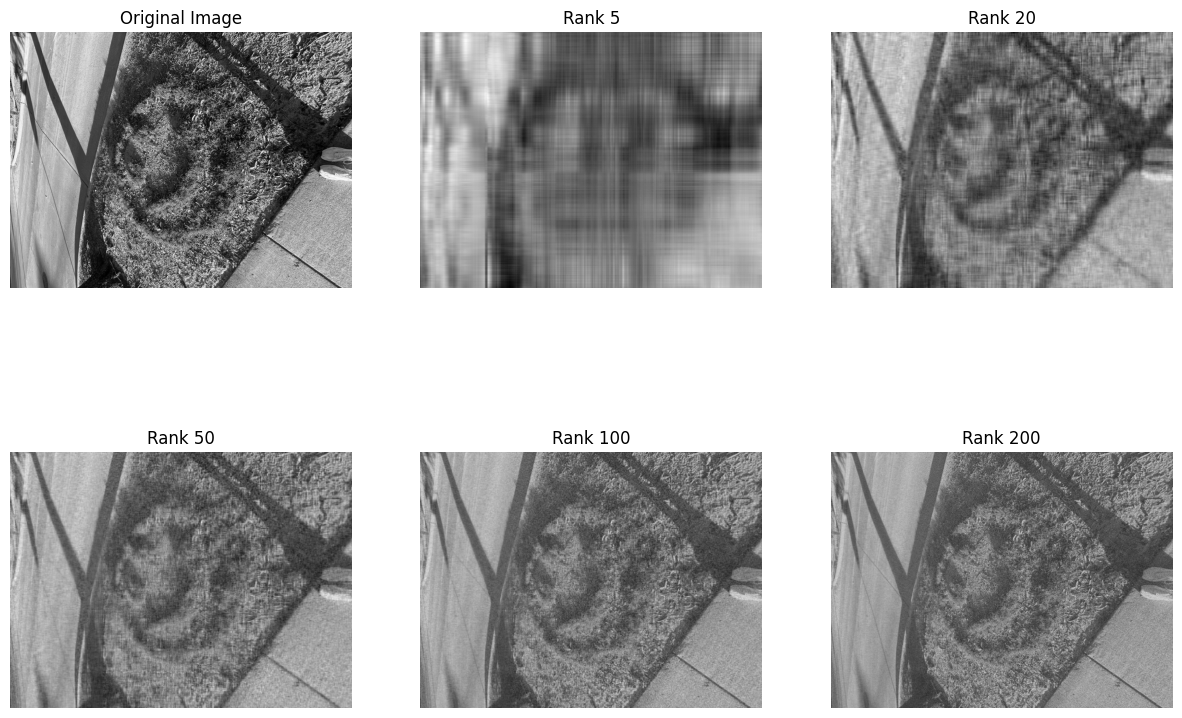

In [ ]:
# Ranks to test
ranks = [5, 20, 50, 100, 200]

# Display results
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Show compressed versions
for i, k in enumerate(ranks):
    compressed_img = reconstruct_image_manual(U, S, V, k)
    plt.subplot(2, 3, i+2)
    plt.imshow(compressed_img, cmap='gray')
    plt.title(f"Rank {k}")
    plt.axis('off')

plt.show()

Defining differents ranks of k to test the different levels of compression, our final figure contains the original image and its compressed versions side by side.

In small ranks, the image looks blurry because only a few singular values are used, capturing major features but missing fine details. In higher ranks, more detail is preserved as more singular values are included, leading to a better approximation.

By selecting a smaller rank 𝑘, the storage needed for the matrices
𝑈𝑘, Σ𝑘, and 𝑉𝑘 is significantly reduced, achieving image compression while retaining recognizable visual information. Image compression helps balance file size, quality, and performance, making it essential for modern technology, from storage and communication to artificial intelligence and digital media.